# Project Name - Cardiovascular Risk Prediction

- Project Type - Cardiovascular Risk Prediction
- Contribution - Group
- Team Member 1 - Vipil Khapre
- Team Member 2 - Pranay Kuthe

# GitHub Link 

# Problem Statement (Data Set Information)

The dataset is from an ongoing cardiovascular study on residents of the town of
Framingham, Massachusetts. The classification goal is to predict whether the
patient has a 10-year risk of future coronary heart disease (CHD). The dataset
provides the patients’ information. It includes over 4,000 records and 15
attributes. Each attribute is a potential risk factor. There are both demographic,
behavioral, and medical risk factors.


# Let's Begin !

## ***1. Know Your Data***

### Import Libraries

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [12]:
df = pd.read_csv('data_cardiovascular_risk.csv',index_col = "id")

### Dataset First and last View

In [14]:
# Dataset first 
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [15]:
# Dataset last 
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [17]:
# Dataset Rows and Columns
df.shape

(3390, 16)

### Dataset Information

In [19]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


### What did you know about your dataset?

The dataset originates from an ongoing cardiovascular study in Framingham, Massachusetts, aimed at predicting whether patients face a 10-year risk of coronary heart disease (CHD). It encompasses more than 4,000 records, featuring 15 attributes encompassing demographic, behavioral, and medical factors. Demographic aspects include "Sex" for gender (coded as "M" or "F"), while "Age" denotes age, treated as continuous even if recorded as whole numbers. Behavioral features incorporate "is_smoking" denoting current smoking status ("YES" or "NO"), and "Cigs Per Day" indicating daily average cigarettes, potentially treated as continuous due to variable values. Medical history attributes comprise "BP Meds" for blood pressure medication, "Prevalent Stroke" for past stroke history, "Prevalent Hyp" for hypertension status, and "Diabetes" for diabetes status – all nominal variables. Present medical attributes include continuous measures like "Tot Chol" (total cholesterol), "Sys BP" (systolic blood pressure), "Dia BP" (diastolic blood pressure), "BMI" (Body Mass Index), "Heart Rate," and "Glucose" levels. The target, "10-year risk of CHD," is binary: "1" for positive risk and "0" for negative risk – the focus of predictive models based on these attributes.

### Checking missing values

In [23]:
# Checking missing values in the dataset
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

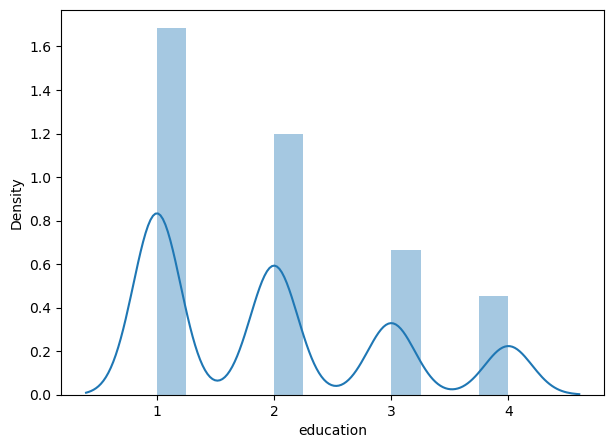

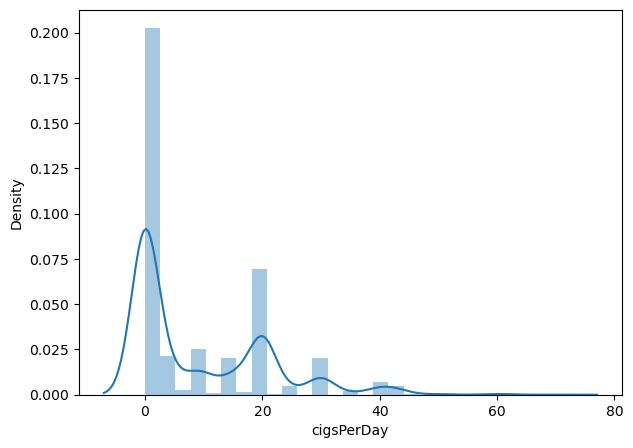

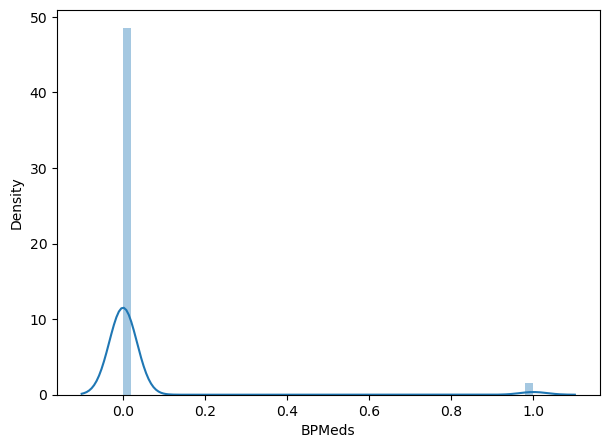

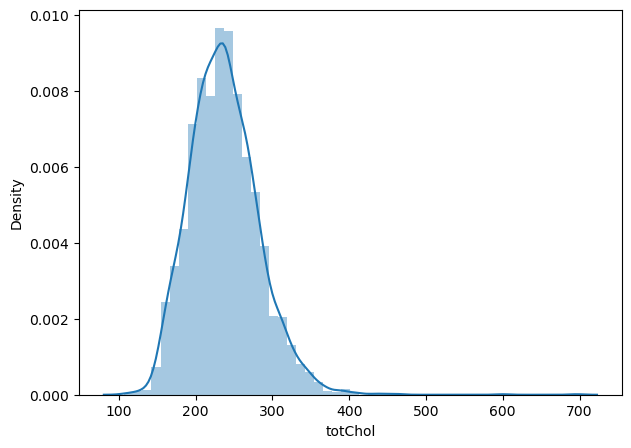

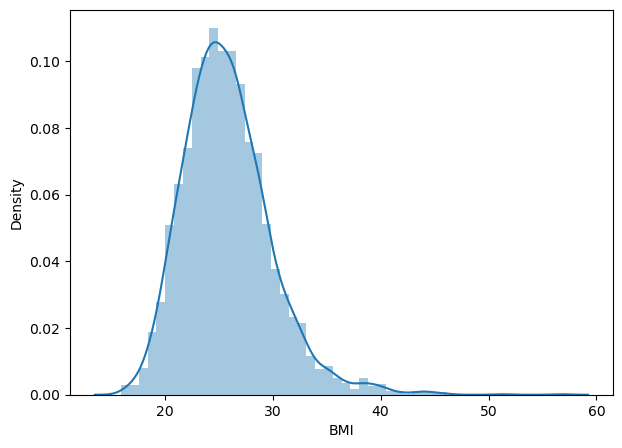

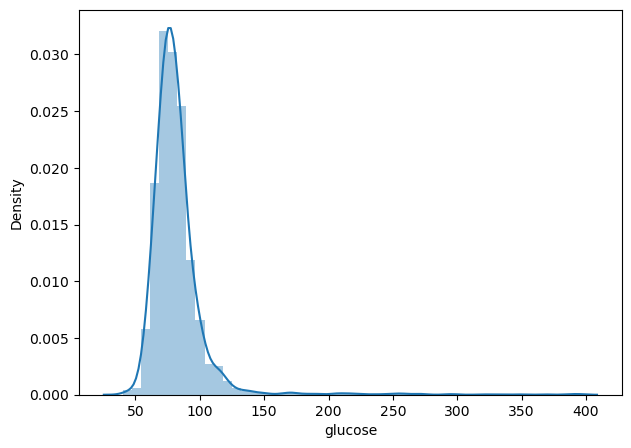

In [24]:
col_name = [df['education'],df['cigsPerDay'],df['BPMeds'],df['totChol'],df['BMI'],df['glucose']]

# Checking the distribution for columns that contains missing values
for col in col_name:
    plt.figure(figsize = (7,5))
    sns.distplot(col)

#### Handling missing values

In [26]:
# fillning null values with mean of that column
df['education'] = df['education'].fillna(df['education'].mode()).astype(int)
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mode())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mean())
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

<Axes: ylabel='id'>

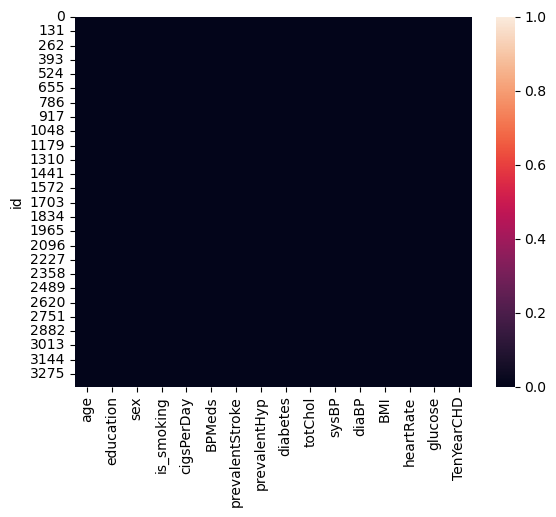

In [27]:
sns.heatmap(df.isnull())

## ***2. Understanding Your Variables***

In [29]:
# Dataset columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Description of variables of the dataframe

In [31]:
# Shoing statistical information for the dataset
df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3389.000000,3390.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.946018,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.017568,NaN,NaN,11.840458,0.169190,0.080309,0.464719,0.158153,44.993041,22.29203,12.023581,4.106939,11.971868,23.131808,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,128.50000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


### Variables Description

- Sex - Gender
- Age - age
- is_smoking - whether smoking currently or not
- Cigs-Per_day - Cigarettes smoked per day
- BP-Meds - Whether taking BP meds or not
- Prevalent Stroke - If the patient has a history of stroke
- Prevalent hyp - If the patient has a history of hypertension
- Diabetes - Patient has diabetes or not
- Tot Chol - Cholesterol measur
- Sys BP - BP measure
- Dia BP - BP measure
- BMI - Body Mass Index
- Heart Rate - Heart Rate measure

### Check Unique Values for each variable.

In [35]:
for i in df.columns.tolist():
    print(f"number of unique values in {i} is {df[i].nunique()}")

number of unique values in age is 39
number of unique values in education is 4
number of unique values in sex is 2
number of unique values in is_smoking is 2
number of unique values in cigsPerDay is 33
number of unique values in BPMeds is 3
number of unique values in prevalentStroke is 2
number of unique values in prevalentHyp is 2
number of unique values in diabetes is 2
number of unique values in totChol is 241
number of unique values in sysBP is 226
number of unique values in diaBP is 142
number of unique values in BMI is 1260
number of unique values in heartRate is 68
number of unique values in glucose is 133
number of unique values in TenYearCHD is 2


### Check duplicate values.

In [37]:
# There is no duplicate value in the dataset
df.duplicated().sum()

0

In [38]:
df.head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [39]:
# Changing the datatype of necessary columns
df['cigsPerDay'] = df['cigsPerDay'].astype(int)
df['education'] = df['education'].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   int64  
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   int64  
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 450.2+ KB
